## Loading Data

In [63]:
import pandas as pd
import numpy as np

In [64]:
features_df = pd.read_csv("../data/training_set_features.csv")
labels_df = pd.read_csv("../data/training_set_labels.csv")
features_df.set_index("respondent_id", inplace=True)
labels_df.set_index("respondent_id", inplace=True)

In [65]:
print("features_df.shape", features_df.shape)
features_df.head()

features_df.shape (26707, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [66]:
features_df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [67]:
print("labels_df.shape", labels_df.shape)
labels_df.head()

labels_df.shape (26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [68]:
#to double-check that the rows between the features and the labels match up, will error if the row indices of the two data frames don't match up
np.testing.assert_array_equal(features_df.index.values, labels_df.index.values)

## Exploratory Data Analysis (EDA)

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt

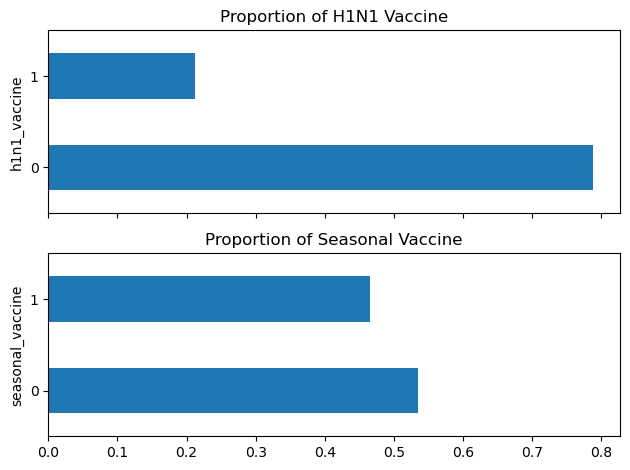

In [70]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = labels_df.shape[0]

(labels_df['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(labels_df['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

Note: H1N1 target has moderately imbalanced classes whilst Seasonal target has balanced classes

In [71]:
pd.crosstab(
    labels_df["h1n1_vaccine"], 
    labels_df["seasonal_vaccine"], 
    margins=True,
    normalize=True
)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


In [72]:
# Phi Coefficient is the same as Pearson for two binary variables
(labels_df["h1n1_vaccine"]
     .corr(labels_df["seasonal_vaccine"], method="pearson")
)

0.37714265306144507

Note: Phi coefficient of 0.37 indicates a moderate positive correlation. Most people who got an H1N1 flu vaccine also got the seasonal flu vaccine. While a minority of people who got the seasonal vaccine got the H1N1 vaccine, but they got the H1N1 vaccine at a higher rate than those who did not get the seasonal vaccine at all.

In [73]:
merged_df = features_df.join(labels_df)
print("merged_df.shape",merged_df.shape)
merged_df.head()

merged_df.shape (26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [74]:
from ydata_profiling import ProfileReport


In [75]:
profile = ProfileReport(merged_df, title="Flu Shot Learning Dataset Profiling Report", explorative=True)
profile.to_file("../data/flu_shot_learning_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 37/37 [00:03<00:00, 10.53it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Key findings in report:

behavioral_large_gatherings is highly overall correlated with behavioral_outside_home	High correlation

behavioral_outside_home is highly overall correlated with behavioral_large_gatherings	High correlation

doctor_recc_h1n1 is highly overall correlated with doctor_recc_seasonal	High correlation

doctor_recc_seasonal is highly overall correlated with doctor_recc_h1n1	High correlation

employment_industry is highly overall correlated with employment_status and health worker High correlation

employment_occupation is highly overall correlated with employment_status and health worker	High correlation

employment_status is highly overall correlated with employment_industry and employment occupation	High correlation

health_worker is highly overall correlated with employment_industry and employment occupation	High correlation

household_adults is highly overall correlated with marital_status	High correlation

marital_status is highly overall correlated with household_adults	High correlation

behavioral_antiviral_meds is highly imbalanced (71.9%)	Binary Categorical Imbalance

behavioral_face_mask is highly imbalanced (63.8%)	Binary Categorical Imbalance

child_under_6_months is highly imbalanced (58.9%)	Binary Categorical Imbalance

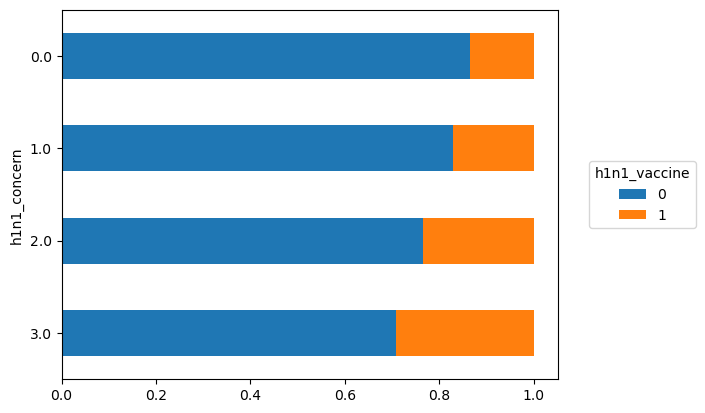

In [76]:
counts = (merged_df[['h1n1_concern', 'h1n1_vaccine']]
              .groupby(['h1n1_concern', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )

#sums the values across each row of counts and stores the result in series h1n1_concern_counts
h1n1_concern_counts = counts.sum(axis='columns')

#does row-wise division of counts by h1n1_concern_counts
props = counts.div(h1n1_concern_counts, axis='index')

ax = props.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

Note: A previous version of this graph used a simple bar graph comparing counts but what was noticed was that due to the the imbalanced class a higher rate of concern just looked like an increase in the number of people not getting a vaccine. By getting the rate we look at the proportion of people that got the vaccine given an increase in concern and this gives us a better view at what is happening.

We can clearly see that even though most people don't get the H1N1 vaccine, they are more likely to if they have a higher level of concern

In [77]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (merged_df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

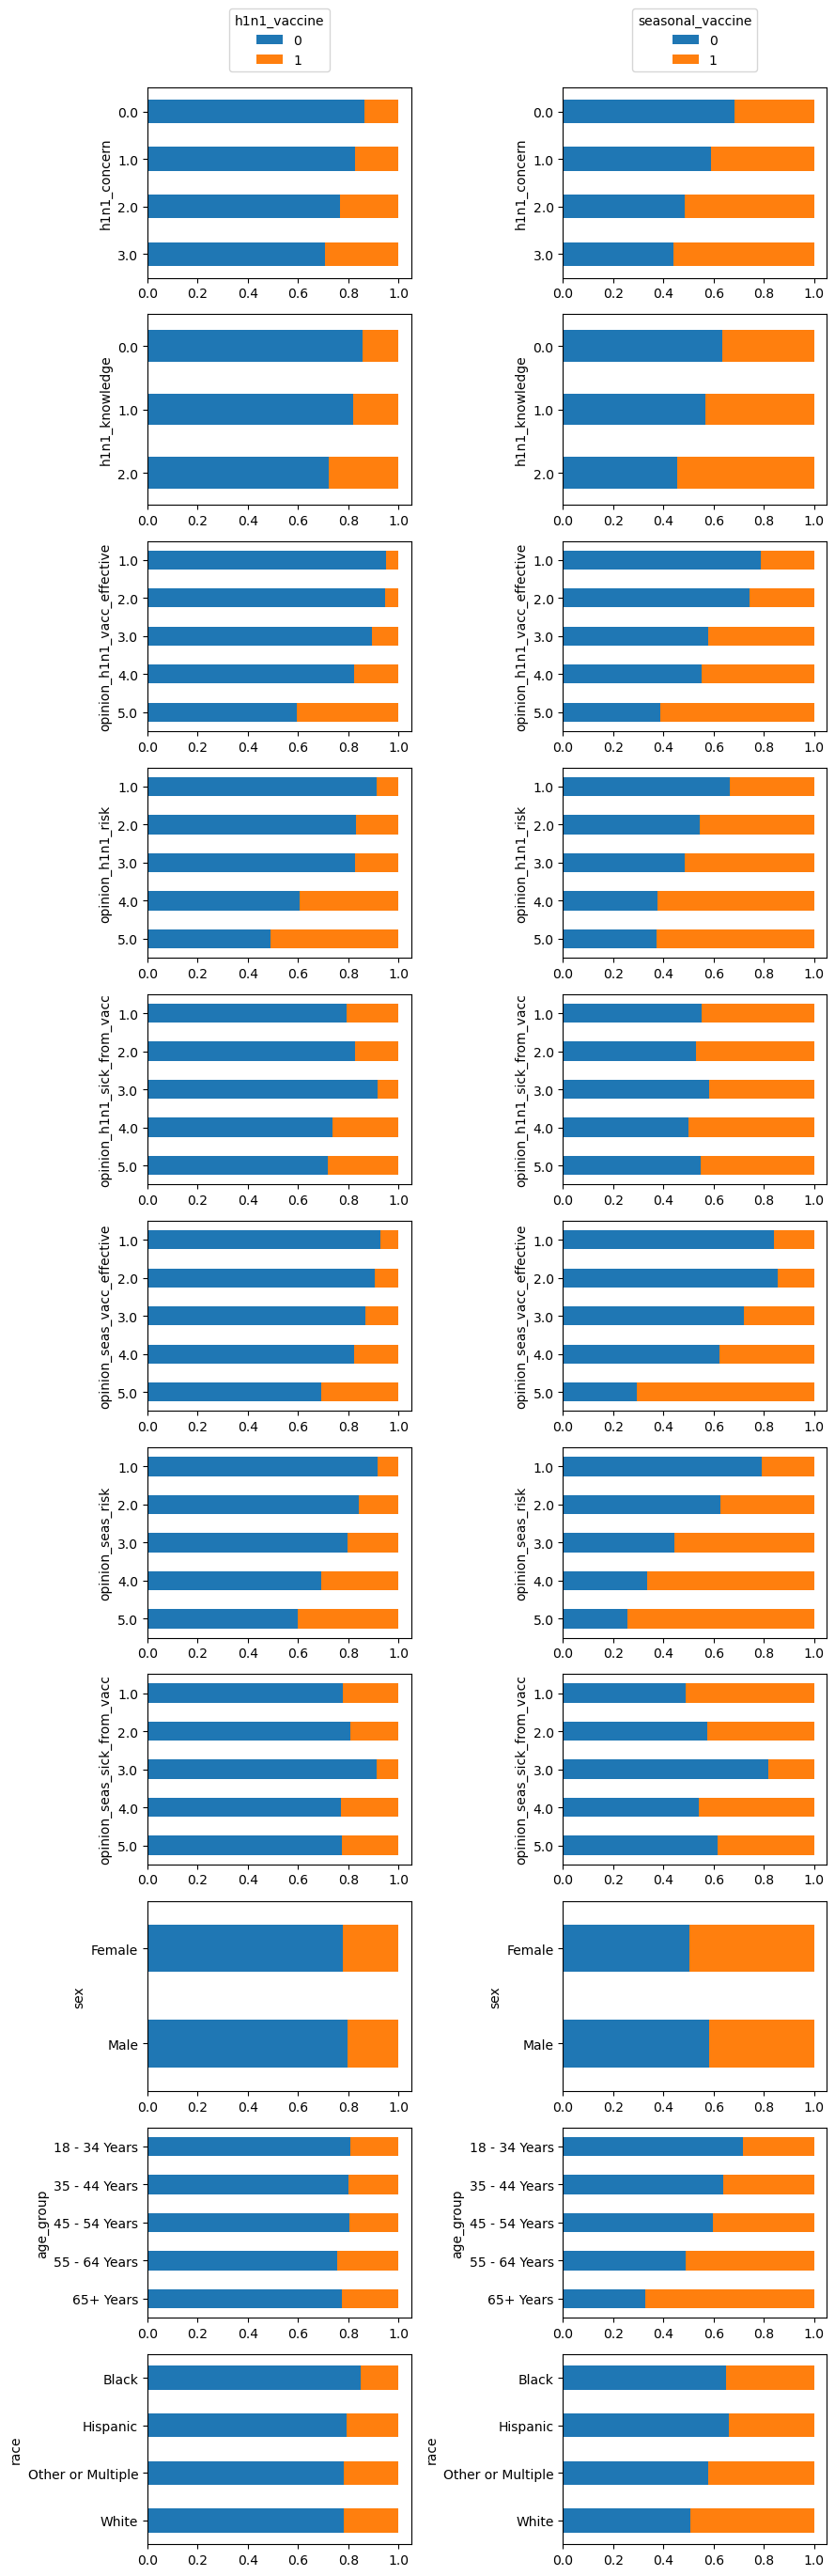

In [78]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(9,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', merged_df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', merged_df, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

Note: We observe a strong correlation between both vaccines and participants' knowledge of H1N1, their opinion on vaccine effectiveness, and their perceived risk of contracting the flu if not vaccinated. Additionally, there appears to be a stronger correlation between receiving the seasonal flu vaccine and demographic features, compared to the correlation observed with the H1N1 vaccine.

From further analysi, there exists a string correlation between the number of adults and children in a household for seasonal vaccines but not for the h1n1 vaccine as well as there is no substantial evidence of correlation between either vaccines and education income poverty, employment status, geo location and census msa.

## Model Build

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    StandardScaler, OneHotEncoder, OrdinalEncoder,FunctionTransformer
)
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import (GridSearchCV,train_test_split)
from sklearn.metrics import roc_curve, roc_auc_score


In [80]:
def h1n1_encode_categorical_features(df):
    """
    Encodes categorical features in the DataFrame using OneHotEncoder.

    Args:
        df (pd.DataFrame): DataFrame containing the data to be encoded.

    Returns:
        pd.DataFrame: DataFrame with encoded categorical features.
    """
    # Create encoder
    one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')

    # Fit and transform specific columns
    one_hot_columns_to_encode = ['race', 'sex','employment_industry', 'employment_occupation', 'marital_status', 'rent_or_own']
    
    one_hot_encoded_data = one_hot_encoder.fit_transform(df[one_hot_columns_to_encode])

    # Get feature names for one-hot encoded columns
    feature_names = one_hot_encoder.get_feature_names_out(one_hot_columns_to_encode)

    # Create DataFrame with one-hot encoded columns
    encoded_df = pd.DataFrame(
        one_hot_encoded_data, columns=feature_names, index=df.index)

    # Drop original categorical one-hot columns, concatenate encoded ones and drop NaN columns
    df = df.drop(columns=one_hot_columns_to_encode)
    df = pd.concat([df, encoded_df], axis=1)
    suffix_to_drop = '_nan'
    columns_to_drop = [
        col for col in df.columns if col.endswith(suffix_to_drop)]
    df = df.drop(columns=columns_to_drop)
    
    
    print("merged_df.shape", df.shape)
    df.head()
    return df

In [81]:
def seasonal_encode_categorical_features(df):
    """
    Encodes categorical features in the DataFrame using OneHotEncoder and OrdinalEncoder.

    Args:
        df (pd.DataFrame): DataFrame containing the data to be encoded.

    Returns:
        pd.DataFrame: DataFrame with encoded categorical features.
    """
    # Create encoder
    one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
    ordinal_encoder = OrdinalEncoder()

    # Fit and transform specific columns
    one_hot_columns_to_encode = ['race', 'sex','employment_industry', 'employment_occupation', 'marital_status', 'rent_or_own']
    ordinal_columns_to_encode = ['age_group']
    
    one_hot_encoded_data = one_hot_encoder.fit_transform(df[one_hot_columns_to_encode])
    df[ordinal_columns_to_encode] = ordinal_encoder.fit_transform(
        df[ordinal_columns_to_encode])

    # Get feature names for one-hot encoded columns
    feature_names = one_hot_encoder.get_feature_names_out(one_hot_columns_to_encode)

    # Create DataFrame with one-hot encoded columns
    encoded_df = pd.DataFrame(
        one_hot_encoded_data, columns=feature_names, index=df.index)

    # Drop original categorical one-hot columns, concatenate encoded ones and drop NaN columns
    df = df.drop(columns=one_hot_columns_to_encode)
    df = pd.concat([df, encoded_df], axis=1)
    suffix_to_drop = '_nan'
    columns_to_drop = [
        col for col in df.columns if col.endswith(suffix_to_drop)]
    df = df.drop(columns=columns_to_drop)
    
    
    print("merged_df.shape", df.shape)
    df.head()
    return df

In [82]:

fullpipeline_h1n1 = Pipeline([
    ('encoder',FunctionTransformer(h1n1_encode_categorical_features, validate=False)),
    ('simple_imputer', SimpleImputer(strategy='median')),
    ('standard_scaler', StandardScaler()),
    ('model', LogisticRegression(penalty='l2', C=1))
])

param_grid_1 = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__solver': ['liblinear', 'lbfgs']
}

h1n1_grid = GridSearchCV(fullpipeline_h1n1, param_grid=param_grid_1, cv=5, scoring='roc_auc')

fullpipeline_seasonal = Pipeline([
    ('encoder',FunctionTransformer(seasonal_encode_categorical_features, validate=False)),
    ('simple_imputer', SimpleImputer(strategy='median')),
    ('standard_scaler', StandardScaler()),
    ('model', LogisticRegression(penalty='l2', C=1))
])

param_grid_2 = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__solver': ['liblinear', 'lbfgs']
}

seasonal_grid = GridSearchCV(fullpipeline_seasonal, param_grid=param_grid_2, cv=5, scoring='roc_auc')

Note: L2 was used to deal with multicollinearity and Binary Categorical Imbalances noted by the EDA report as well as reduce overfitting

In [83]:

RANDOM_SEED = 42

X_train, X_eval, y_train, y_eval = train_test_split(
    features_df,
    labels_df,
    test_size=0.33,
    shuffle=True,
    stratify=labels_df,  # Stratify on both target columns
    random_state=RANDOM_SEED
)

# Now, X_train and X_eval contain the same respondents. Same for y_train and y_eval.
print("Shape of unified X_train:", X_train.shape)
print("Shape of unified X_eval:", X_eval.shape)

h1n1_cols_to_drop = ['opinion_h1n1_sick_from_vacc', 'opinion_seas_sick_from_vacc', 'age_group','race_Hispanic','race_Other or Multiple','race_White','education', 'income_poverty', 'employment_status', 'hhs_geo_region','census_msa','household_adults', 'household_children']
h1n1_X_train = X_train.drop(columns=h1n1_cols_to_drop)
h1n1_X_eval = X_eval.drop(columns=h1n1_cols_to_drop)
h1n1_y_train = y_train[['h1n1_vaccine']]
h1n1_y_eval = y_eval[['h1n1_vaccine']]

seasonal_cols_to_drop = ['opinion_h1n1_sick_from_vacc', 'opinion_seas_sick_from_vacc','education', 'income_poverty', 'employment_status', 'hhs_geo_region','census_msa']
seasonal_X_train = X_train.drop(columns=seasonal_cols_to_drop)
seasonal_X_eval = X_eval.drop(columns=seasonal_cols_to_drop)
seasonal_y_train = y_train[['seasonal_vaccine']]
seasonal_y_eval = y_eval[['seasonal_vaccine']]

assert h1n1_X_eval.index.equals(seasonal_X_eval.index)
print("\nSanity check passed: H1N1 and Seasonal evaluation sets have the same indices.")

Shape of unified X_train: (17893, 35)
Shape of unified X_eval: (8814, 35)


KeyError: "['race_Hispanic', 'race_Other or Multiple', 'race_White'] not found in axis"

Note: stratify argument used to avoid lopsided splits and generalization due to 1n1_vaccine label classes moderate imbalance.

Inputs with poor or no correlation were removed to reduce noise, improve mcomputational and regularization efficiency.

In [ ]:
%%time

# Train models
fullpipeline_h1n1.fit(h1n1_X_train, h1n1_y_train)
fullpipeline_seasonal.fit(seasonal_X_train, seasonal_y_train)
model_bundle = {'h1n1': fullpipeline_h1n1, 'seasonal': fullpipeline_seasonal}

h1n1_preds_proba = model_bundle['h1n1'].predict_proba(h1n1_X_eval)[:, 1]

seasonal_preds_proba = model_bundle['seasonal'].predict_proba(seasonal_X_eval)[:, 1]

# Check the shape of the prediction arrays
print(f"Shape of H1N1 prediction probabilities: {h1n1_preds_proba.shape}")
print(f"Shape of H1N1 evaluation labels: {h1n1_y_eval.shape}")
print("-" * 30)
print(f"Shape of Seasonal prediction probabilities: {seasonal_preds_proba.shape}")
print(f"Shape of Seasonal evaluation labels: {seasonal_y_eval.shape}")

h1n1_results = pd.Series(h1n1_preds_proba, index=h1n1_X_eval.index, name='h1n1_predicted_proba')
seasonal_results = pd.Series(seasonal_preds_proba, index=seasonal_X_eval.index, name='seasonal_predicted_proba')

# Combine them into a single DataFrame. Pandas will align on the index.
# Individuals not in one of the eval sets will have a NaN.
predictions_df = pd.concat([h1n1_results, seasonal_results], axis=1)

print("\nSide-by-side predictions DataFrame:")
print(predictions_df.head())


merged_df.shape (17893, 67)


c:\Users\NEW ERA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


merged_df.shape (17893, 70)


c:\Users\NEW ERA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


merged_df.shape (8814, 67)
merged_df.shape (8814, 70)
Shape of H1N1 prediction probabilities: (8814,)
Shape of H1N1 evaluation labels: (8814, 1)
------------------------------
Shape of Seasonal prediction probabilities: (8814,)
Shape of Seasonal evaluation labels: (8814, 1)

Side-by-side predictions DataFrame:
               h1n1_predicted_proba  seasonal_predicted_proba
respondent_id                                                
8117                       0.117524                       NaN
15516                      0.099888                       NaN
10976                      0.051046                       NaN
4330                       0.253159                       NaN
1402                       0.051627                  0.119823
CPU times: total: 1.09 s
Wall time: 1.27 s
